# Machine Learning Assignment - 1
# Anirudh A (2018B4A70936H), Ruthvik Reddy (2018B4A70701H)

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

### Loading Data Set

In [3]:
floc = 'C:/Users/Dell/Downloads/Assignment 1/data/'

### Normalised Data

In [4]:
from sklearn.preprocessing import MinMaxScaler
def normalizedata(X_train):
    scaler=MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    return X_train

# K Mean Clustering - Silhouette Coefficient (Un Normalised)

In [6]:
#choose all 56 files. We take K values 2,3,...10
#initialize an array s with zeroes. It holds the Si values for all 56 files WRT 9 values of K.
s = np.zeros((56,9))
for i in range(1,57):
    fname = floc + str(i) + '.csv'
    data = genfromtxt(fname, delimiter = ',')
    for j in range(2,11):
        kmeans = KMeans(n_clusters = j, random_state=0).fit(data[:,0:-1])
        s[i-1,j-2] = silhouette_score(data[:,0:-1], kmeans.labels_, metric = 'euclidean');

### Array format, Box Plot and Descriptive Statistics

In [7]:
s

array([[0.8676572 , 0.64493862, 0.62602527, 0.57340019, 0.56520025,
        0.57359512, 0.46186155, 0.44744722, 0.43807643],
       [0.76125671, 0.65357012, 0.65175386, 0.66409966, 0.59870633,
        0.5042691 , 0.49641698, 0.45254315, 0.45509137],
       [0.79507639, 0.71052467, 0.69176766, 0.66510603, 0.66018213,
        0.57934325, 0.56455241, 0.55186951, 0.55340564],
       [0.74974628, 0.73355251, 0.6731855 , 0.67103845, 0.59797161,
        0.60130115, 0.60028382, 0.51060001, 0.52517704],
       [0.79409468, 0.76783096, 0.70204791, 0.70292451, 0.58032345,
        0.57305911, 0.5669002 , 0.52429668, 0.50810666],
       [0.80359723, 0.76684327, 0.74555843, 0.5752244 , 0.56338342,
        0.55182401, 0.5552794 , 0.52994297, 0.54113007],
       [0.89012574, 0.66763086, 0.64260498, 0.63613949, 0.61756657,
        0.63337027, 0.599199  , 0.58150807, 0.57641149],
       [0.9022708 , 0.72991301, 0.70510488, 0.55649026, 0.56180033,
        0.53576253, 0.53641418, 0.43958879, 0.47243984],


Text(0, 0.5, 'Silhouette Value')

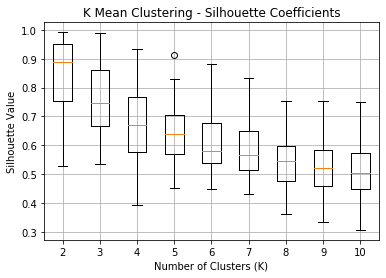

In [8]:
plt.boxplot(s, labels=['2','3','4','5','6','7','8','9','10'])
plt.grid(True)
plt.title("K Mean Clustering - Silhouette Coefficients")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Value")

In [9]:
import pandas as pd
df_s = pd.DataFrame(s)
df_s.describe()

,0,1,2,3,4,5,6,7,8
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,0.851604,0.760523,0.674655,0.644571,0.611242,0.585916,0.545748,0.528992,0.509172
std,0.118618,0.127309,0.118988,0.104682,0.099872,0.097494,0.081802,0.090295,0.087937
min,0.528421,0.535626,0.393781,0.450235,0.449046,0.430564,0.362789,0.335127,0.306502
25%,0.753713,0.666611,0.576398,0.571367,0.537517,0.514564,0.476815,0.458885,0.448742
50%,0.890555,0.747039,0.670977,0.639187,0.581663,0.568034,0.545447,0.522956,0.504024
75%,0.950657,0.861928,0.766752,0.706595,0.677469,0.649538,0.596180,0.583686,0.572883
max,0.992127,0.988643,0.933820,0.912864,0.880613,0.831756,0.754535,0.752558,0.749027


In [21]:
np.savetxt('C:/Users/Dell/Downloads/Sil.csv', s, delimiter = ',', fmt='%f')


## Conclusion
### From the Silhouette values, descriptive statistics and Box Plot, it is evident that we get the maximum Si value for K=2. So, K=2 gives the best clustering for the given files. 

# K Mean Clustering - Silhouette Coefficient (Normalised Data)

In [10]:
sn = np.zeros((56,9))
for i in range(1,57):
    fname = floc + str(i) + '.csv'
    data = genfromtxt(fname, delimiter = ',')
    data[:,0:-1] = normalizedata(data[:,0:-1])
    for j in range(2,11):
        kmeans = KMeans(n_clusters = j, random_state=0).fit(data[:,0:-1])
        sn[i-1,j-2] = silhouette_score(data[:,0:-1], kmeans.labels_, metric = 'euclidean');

### Array format, Box Plot and Descriptive Statistics

In [11]:
sn

array([[0.30451226, 0.34669539, 0.285632  , 0.28263133, 0.29851358,
        0.30716052, 0.28144841, 0.25028246, 0.26218267],
       [0.33152161, 0.32519654, 0.35467796, 0.33667477, 0.34389557,
        0.32947305, 0.29404799, 0.29712114, 0.27508579],
       [0.3520433 , 0.33972549, 0.37628901, 0.33474695, 0.33350538,
        0.31484067, 0.29308884, 0.29093197, 0.29087145],
       [0.3688167 , 0.34517492, 0.37416774, 0.353464  , 0.31510786,
        0.28655044, 0.27714014, 0.3088408 , 0.28737226],
       [0.37811283, 0.35237301, 0.39098039, 0.37393545, 0.32040946,
        0.31450757, 0.31783248, 0.28990921, 0.27305855],
       [0.42077111, 0.45798476, 0.4608297 , 0.48226562, 0.45781746,
        0.41514808, 0.4090865 , 0.41576519, 0.42050789],
       [0.45119484, 0.41285097, 0.42904767, 0.45694691, 0.48594459,
        0.48983285, 0.48951664, 0.50707759, 0.4703167 ],
       [0.42605014, 0.35344259, 0.36288983, 0.32865168, 0.3376336 ,
        0.31480655, 0.30528657, 0.31260181, 0.28166588],


Text(0, 0.5, 'Silhouette Value')

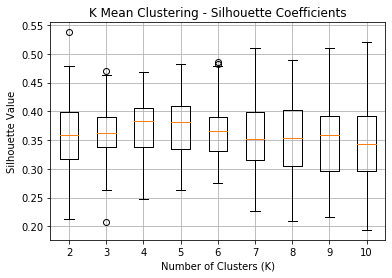

In [12]:
plt.boxplot(sn, labels=['2','3','4','5','6','7','8','9','10'])
plt.grid(True)
plt.title("K Mean Clustering - Silhouette Coefficients")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Value")

In [13]:
df_sn = pd.DataFrame(sn)
df_sn.describe()

,0,1,2,3,4,5,6,7,8
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,0.361958,0.361818,0.374579,0.373472,0.365810,0.359763,0.358872,0.356725,0.351783
std,0.062176,0.052410,0.053662,0.054969,0.053459,0.061908,0.065201,0.067864,0.072320
min,0.213572,0.206864,0.246806,0.262711,0.275787,0.227638,0.210205,0.216068,0.193888
25%,0.317766,0.337435,0.337493,0.334256,0.330481,0.314832,0.305001,0.296831,0.296868
50%,0.358279,0.363028,0.384112,0.381873,0.366695,0.351385,0.352907,0.358297,0.343494
75%,0.399794,0.389775,0.406330,0.409730,0.390100,0.399382,0.401967,0.391869,0.391773
max,0.537623,0.470117,0.469270,0.482266,0.485945,0.510409,0.489517,0.509589,0.520252


In [15]:
np.savetxt('C:/Users/Dell/Downloads/SilNorm.csv', sn, delimiter = ',', fmt='%f')

## Conclusion
### From the Silhouette values, descriptive statistics and Box Plot, it is evident that we get the maximum Si value for K=4. So, K=4 gives the best clustering for the given files. 

# K Mean Clustering - DB Index (Un Normalised)

In [18]:
db = np.zeros((56,9))
for i in range(1,57):
    fname = floc + str(i) + '.csv'
    data = genfromtxt(fname, delimiter = ',')
    for j in range(2,11):
        kmeans = KMeans(n_clusters = j, random_state=0).fit(data[:,0:-1])
        db[i-1,j-2] = davies_bouldin_score(data[:,0:-1], kmeans.labels_);

### Array format and Box Plot

In [19]:
db

array([[0.27305566, 0.49861286, 0.47749558, 0.54570448, 0.42778879,
        0.35655263, 0.43113473, 0.52022479, 0.544347  ],
       [0.73849846, 0.49512645, 0.45579245, 0.40517355, 0.48822922,
        0.5599218 , 0.65498058, 0.71187512, 0.69562489],
       [0.81796461, 0.70110226, 0.73917434, 0.59940727, 0.5079431 ,
        0.54485481, 0.49364907, 0.49171238, 0.51191195],
       [0.78574572, 0.61446383, 0.69733714, 0.60222492, 0.67167235,
        0.54866337, 0.51288213, 0.58715548, 0.59009827],
       [0.74253816, 0.58176931, 0.76710998, 0.80577091, 0.79592937,
        0.71265187, 0.59618484, 0.64790232, 0.5701187 ],
       [0.67363633, 0.66407952, 0.66297916, 0.74658095, 0.56069992,
        0.58995786, 0.47399748, 0.51114868, 0.50096295],
       [0.23305298, 0.42975598, 0.38638083, 0.39425147, 0.37462895,
        0.33667074, 0.32185911, 0.21738642, 0.23480627],
       [0.45984192, 0.68914593, 0.51782012, 0.64568429, 0.66065539,
        0.61172199, 0.54163123, 0.61839711, 0.61151656],


Text(0, 0.5, 'DB Index')

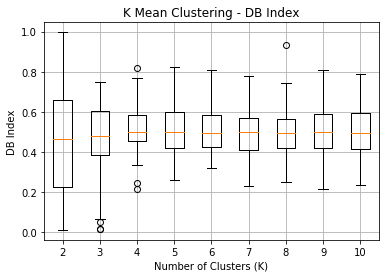

In [20]:
plt.boxplot(db, labels=['2','3','4','5','6','7','8','9','10'])
plt.grid(True)
plt.title("K Mean Clustering - DB Index")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("DB Index")

In [21]:
df_db = pd.DataFrame(db)
df_db.describe()

,0,1,2,3,4,5,6,7,8
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,0.431344,0.470728,0.516827,0.516500,0.512959,0.490604,0.498424,0.494842,0.501873
std,0.262428,0.179749,0.129243,0.127665,0.125229,0.127679,0.132191,0.134035,0.128070
min,0.011942,0.014537,0.217619,0.259836,0.322440,0.232403,0.251447,0.217386,0.234806
25%,0.224826,0.387440,0.455459,0.420548,0.425966,0.409224,0.417955,0.421434,0.413284
50%,0.462972,0.480568,0.500613,0.501978,0.497005,0.500671,0.496015,0.499649,0.497103
75%,0.660907,0.604496,0.586727,0.600112,0.583736,0.567114,0.563558,0.589308,0.592107
max,0.996793,0.746644,0.818969,0.824308,0.808139,0.777761,0.933051,0.808174,0.790851


In [22]:
np.savetxt('C:/Users/Dell/Downloads/DB.csv', db, delimiter = ',', fmt='%f')

## Conclusion
### From the DB Index values, descriptive statistics and Box Plot, it is evident that we get the minimum DB value for K=2. So, K=2 gives the best clustering for the given files. 

# K Mean Clustering - DB Index (Normalised Data)

In [14]:
db_n = np.zeros((56,9))
for i in range(1,57):
    fname = floc + str(i) + '.csv'
    data = genfromtxt(fname, delimiter = ',')
    data[:,0:-1] = normalizedata(data[:,0:-1])
    for j in range(2,11):
        kmeans = KMeans(n_clusters = j, random_state=0).fit(data[:,0:-1])
        db_n[i-1,j-2] = davies_bouldin_score(data[:,0:-1], kmeans.labels_);

### Array format and Box Plot

In [15]:
db_n

array([[1.4294652 , 1.18333605, 1.37700922, 1.24058873, 1.32146907,
        1.24847843, 1.27879326, 1.3260653 , 1.22141085],
       [1.26249132, 1.19184533, 1.1180763 , 1.15575134, 1.08080176,
        1.21878864, 1.29041671, 1.29951645, 1.22824288],
       [1.24590003, 1.11660993, 1.02942893, 1.1989339 , 1.21164373,
        1.26412265, 1.33463186, 1.23068146, 1.25549355],
       [1.17398688, 1.12495533, 1.0222028 , 1.1918216 , 1.25267356,
        1.3203606 , 1.35056423, 1.30494513, 1.242041  ],
       [1.16897151, 1.07823854, 0.9754954 , 1.14359678, 1.28585161,
        1.32189968, 1.27876317, 1.28827837, 1.32025838],
       [1.07810885, 0.79296557, 0.97107161, 0.91488544, 0.86221697,
        0.89353876, 0.96423649, 0.8363237 , 0.83317006],
       [0.63325954, 0.87498562, 0.99237447, 0.8512711 , 0.77415919,
        0.77427775, 0.71063138, 0.63149039, 0.70586975],
       [0.97815271, 1.16756802, 1.15034562, 1.19267026, 1.23161131,
        1.25262944, 1.18632347, 1.11390778, 1.24249929],


Text(0, 0.5, 'DB Index')

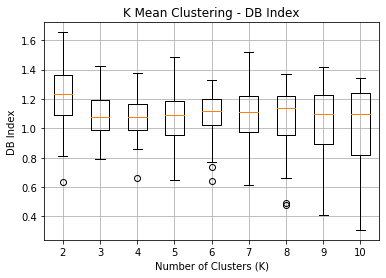

In [16]:
plt.boxplot(db_n, labels=['2','3','4','5','6','7','8','9','10'])
plt.grid(True)
plt.title("K Mean Clustering - DB Index")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("DB Index")

In [17]:
df_dbn = pd.DataFrame(db_n)
df_dbn.describe()

,0,1,2,3,4,5,6,7,8
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.220274,1.099135,1.081612,1.065053,1.094432,1.077027,1.067165,1.041364,1.026874
std,0.196354,0.157577,0.135026,0.168105,0.158730,0.193147,0.219370,0.241256,0.259121
min,0.633260,0.792966,0.662622,0.646535,0.643902,0.617140,0.478224,0.408172,0.308693
25%,1.093540,0.987135,0.989188,0.956015,1.019661,0.971768,0.954350,0.893333,0.819734
50%,1.233596,1.074910,1.073905,1.093307,1.116670,1.113536,1.136198,1.100619,1.096309
75%,1.364665,1.196197,1.164258,1.187525,1.196651,1.218864,1.222388,1.225863,1.241889
max,1.653936,1.425473,1.377009,1.487924,1.330482,1.519177,1.367185,1.415908,1.339954


In [20]:
np.savetxt('C:/Users/Dell/Downloads/DB.csv', db_n, delimiter = ',', fmt='%f')

## Conclusion
### From the DB Index values, descriptive statistics and Box Plot, it is evident that we get the minimum DB value for K=3. So, K=3 gives the best clustering for the given files. 